In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe_train = pd.read_csv('data/dataset.csv')

In [3]:
train_data = dataframe_train.copy()

In [4]:
for i in range(0, len(train_data)):
    if train_data['Power'][i] == 'null bhp':
        train_data['Power'][i] = np.nan

<ipython-input-4-dee6f472c9e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Power'][i] = np.nan


In [5]:
for i in range(0, len(train_data)):
    if train_data['Mileage'][i] == '0.0 kmpl' or train_data['Mileage'][i] == '0.0 km/kg':
        train_data['Mileage'][i] = np.nan

<ipython-input-5-01f227497890>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Mileage'][i] = np.nan


In [6]:
for i in range(0, len(train_data)):
    if train_data['Engine'][i] == 'null CC' or train_data['Engine'][i] == '0 CC':
        train_data['Engine'][i] = np.nan

In [7]:
train_data.isnull().sum() 

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage               70
Engine                36
Power                143
Seats                 42
Price                  0
dtype: int64

In [8]:
train_data.dropna(inplace=True)

In [9]:
train_data.isnull().sum() 

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5844 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5844 non-null   object 
 1   Location           5844 non-null   object 
 2   Year               5844 non-null   int64  
 3   Kilometers_Driven  5844 non-null   int64  
 4   Fuel_Type          5844 non-null   object 
 5   Transmission       5844 non-null   object 
 6   Owner_Type         5844 non-null   object 
 7   Mileage            5844 non-null   object 
 8   Engine             5844 non-null   object 
 9   Power              5844 non-null   object 
 10  Seats              5844 non-null   float64
 11  Price              5844 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 593.5+ KB


In [11]:
len(train_data)

5844

In [12]:
train_data.reset_index(inplace=True)

In [13]:
y = train_data.iloc[:, -1].values

In [14]:
City = train_data['Location'].unique()

In [15]:
City

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [16]:
brand = []
for i in range(0, 5844):
    try:
        k=train_data['Name'][i].split()
        brand.append(k[0].upper())
    except:
        pass

In [17]:
len(brand)

5844

In [18]:
Brand = np.array(brand)

C:\Users\raksh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'MARUTI'),
 Text(1, 0, 'HYUNDAI'),
 Text(2, 0, 'HONDA'),
 Text(3, 0, 'AUDI'),
 Text(4, 0, 'NISSAN'),
 Text(5, 0, 'TOYOTA'),
 Text(6, 0, 'VOLKSWAGEN'),
 Text(7, 0, 'TATA'),
 Text(8, 0, 'LAND'),
 Text(9, 0, 'MITSUBISHI'),
 Text(10, 0, 'RENAULT'),
 Text(11, 0, 'MERCEDES-BENZ'),
 Text(12, 0, 'BMW'),
 Text(13, 0, 'MAHINDRA'),
 Text(14, 0, 'FORD'),
 Text(15, 0, 'PORSCHE'),
 Text(16, 0, 'DATSUN'),
 Text(17, 0, 'JAGUAR'),
 Text(18, 0, 'VOLVO'),
 Text(19, 0, 'CHEVROLET'),
 Text(20, 0, 'SKODA'),
 Text(21, 0, 'MINI'),
 Text(22, 0, 'FIAT'),
 Text(23, 0, 'JEEP'),
 Text(24, 0, 'AMBASSADOR'),
 Text(25, 0, 'ISUZU'),
 Text(26, 0, 'FORCE'),
 Text(27, 0, 'BENTLEY'),
 Text(28, 0, 'LAMBORGHINI')]

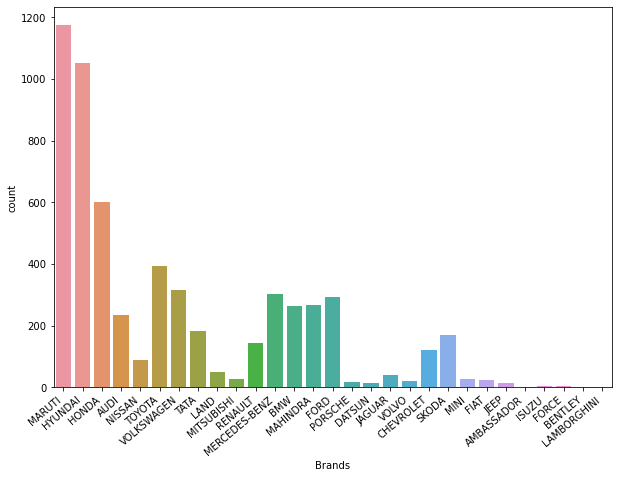

In [19]:
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1, 1, 1)
ax = sns.countplot(Brand)
ax.set_xlabel("Brands")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')

In [20]:
Brand = pd.get_dummies(Brand, drop_first=True, dtype=int)

In [21]:
unique_brands = []
for i in range(0, 5844):
    if brand[i] in unique_brands:
        continue
    else:
        unique_brands.append(brand[i])

C:\Users\raksh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


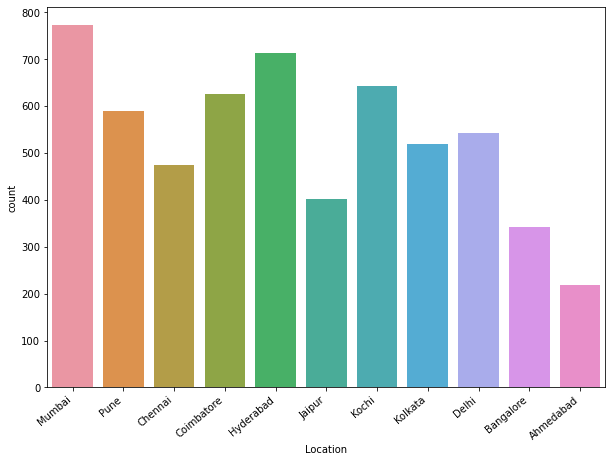

In [22]:
Loc = train_data['Location']

fig = plt.figure(figsize=(10, 7))
fig.add_subplot(1, 1, 1)
ax = sns.countplot(Loc)
ax.set_xlabel("Location")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')

Loc = pd.get_dummies(Loc, drop_first=True, dtype=int)

C:\Users\raksh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Seats')

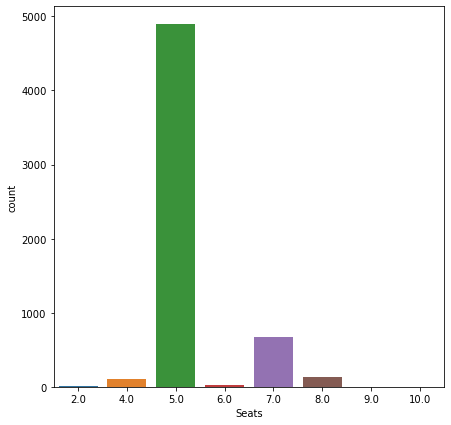

In [23]:
fig = plt.figure(figsize=(7, 7))
fig.add_subplot(1, 1, 1)
ax = sns.countplot(train_data['Seats'])
ax.set_xlabel("Seats")

C:\Users\raksh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Fuel Type')

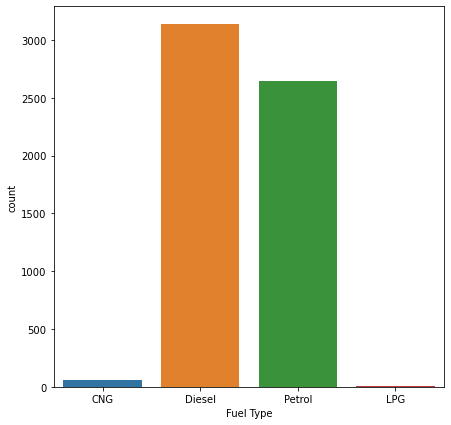

In [24]:
fig = plt.figure(figsize=(7, 7))
fig.add_subplot(1, 1, 1)
ax = sns.countplot(train_data['Fuel_Type'])
ax.set_xlabel("Fuel Type")

C:\Users\raksh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Transmission')

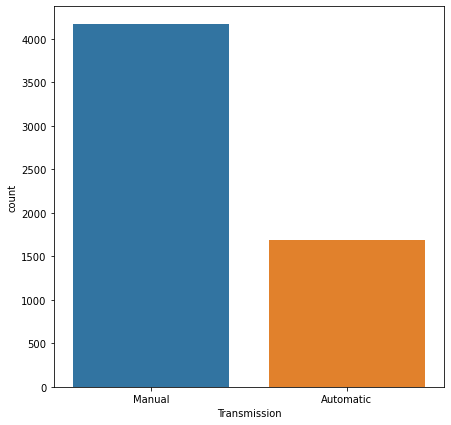

In [25]:
fig = plt.figure(figsize=(7, 7))
fig.add_subplot(1, 1, 1)
ax = sns.countplot(train_data['Transmission'])
ax.set_xlabel("Transmission")

C:\Users\raksh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Owner Type')

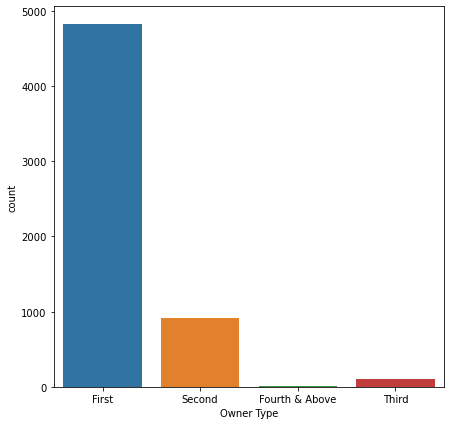

In [26]:
fig = plt.figure(figsize=(7, 7))
fig.add_subplot(1, 1, 1)
ax = sns.countplot(train_data['Owner_Type'])
ax.set_xlabel("Owner Type")

In [27]:
train_data.replace({'First': 1, 'Second': 2, 'Third': 3, 'Fourth & Above': 4}, inplace=True)

In [28]:
for i in range(0, 5844):
    try:
        k = train_data['Mileage'][i].split()
        train_data['Mileage'][i] = k[0]
    except:
        train_data['Mileage'][i]=train_data['Mileage'][i]

<ipython-input-28-60b117fa2c6c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Mileage'][i] = k[0]


In [29]:
for i in range(0, 5844):
    try:
        k = train_data['Power'][i].split()
        train_data['Power'][i] = k[0]
    except:
        train_data['Power'][i]=train_data['Power'][i]

<ipython-input-29-d17a84404de0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Power'][i] = k[0]


In [30]:
for i in range(0, 5844):
    try:
        k = train_data['Engine'][i].split()
        train_data['Engine'][i] = k[0]
    except:
        train_data['Engine'][i]=train_data['Engine'][i]

<ipython-input-30-2ed35bdad5dd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Engine'][i] = k[0]


In [31]:
train_data['Engine'] = train_data['Engine'].astype(int)
train_data['Power'] = train_data['Power'].astype(float)
train_data['Mileage'] = train_data['Mileage'].astype(float)

In [32]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5844 entries, 0 to 5843
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              5844 non-null   int64  
 1   Name               5844 non-null   object 
 2   Location           5844 non-null   object 
 3   Year               5844 non-null   int64  
 4   Kilometers_Driven  5844 non-null   int64  
 5   Fuel_Type          5844 non-null   object 
 6   Transmission       5844 non-null   object 
 7   Owner_Type         5844 non-null   int64  
 8   Mileage            5844 non-null   float64
 9   Engine             5844 non-null   int32  
 10  Power              5844 non-null   float64
 11  Seats              5844 non-null   float64
 12  Price              5844 non-null   float64
dtypes: float64(4), int32(1), int64(4), object(4)
memory usage: 570.8+ KB


In [33]:
Fuel = train_data['Fuel_Type']
Fuel = pd.get_dummies(Fuel, drop_first=True, dtype=int)

Trans = train_data['Transmission']
Trans = pd.get_dummies(Trans, drop_first=True, dtype=int)

In [34]:
data_train = pd.concat([train_data, Brand, Loc, Fuel, Trans], axis=1)

In [35]:
data_train.drop(["Name", "Location", "Fuel_Type", 'Transmission', 'Price'], axis=1, inplace=True)

In [36]:
data_train.drop(['index'], axis=1, inplace=True)

In [37]:
data_train

,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,AUDI,BENTLEY,BMW,...,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Diesel,LPG,Petrol,Manual
0,2010,72000,1,26.60,998,58.16,5.0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2015,41000,1,19.67,1582,126.20,5.0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
2,2011,46000,1,18.20,1199,88.70,5.0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,2012,87000,1,20.77,1248,88.76,7.0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,2013,40670,2,15.20,1968,140.80,5.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5839,2014,27365,1,28.40,1248,74.00,5.0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
5840,2015,100000,1,24.40,1120,71.00,5.0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
5841,2012,55000,2,14.00,2498,112.00,8.0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
5842,2013,46000,1,18.90,998,67.10,5.0,0,0,0,...,0,0,0,1,0,0,0,0,1,1


In [38]:
X = data_train.copy()

<AxesSubplot:>

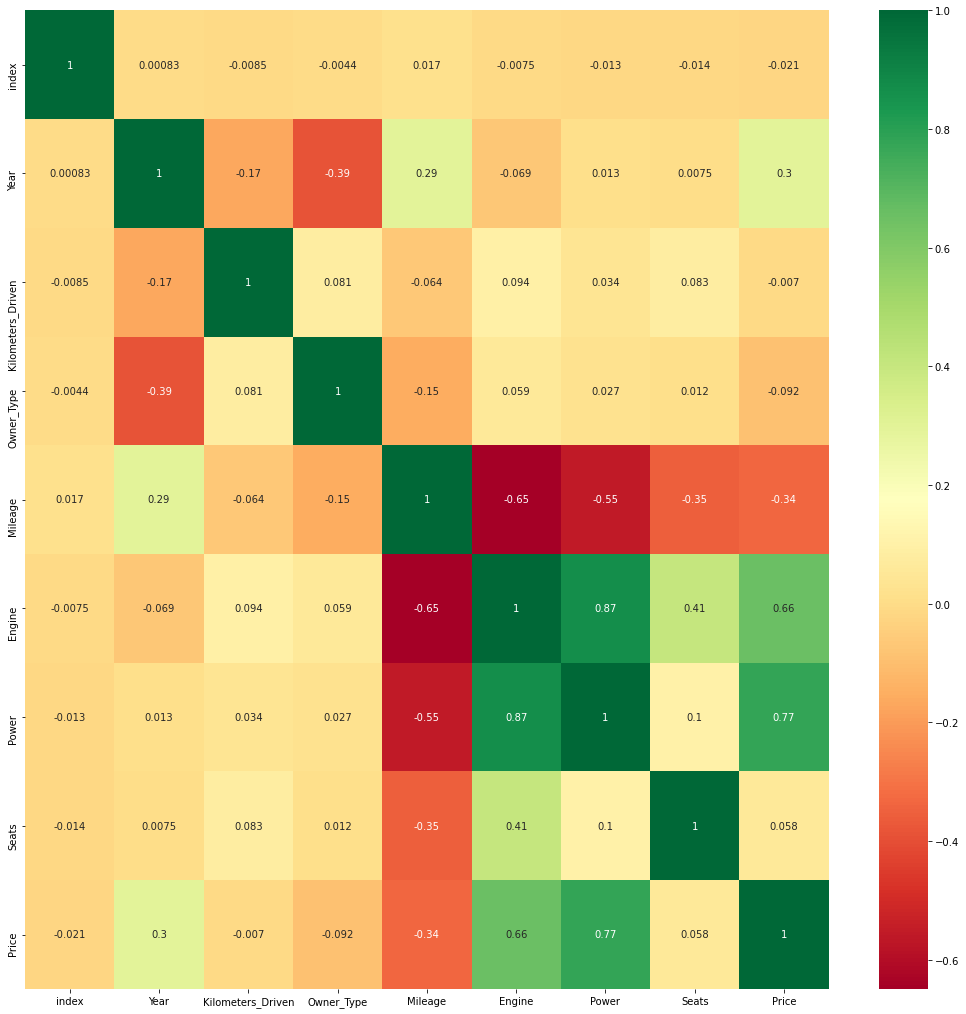

In [39]:
plt.figure(figsize=(18, 18))
sns.heatmap(train_data.corr(), annot=True, cmap="RdYlGn")

In [40]:
from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

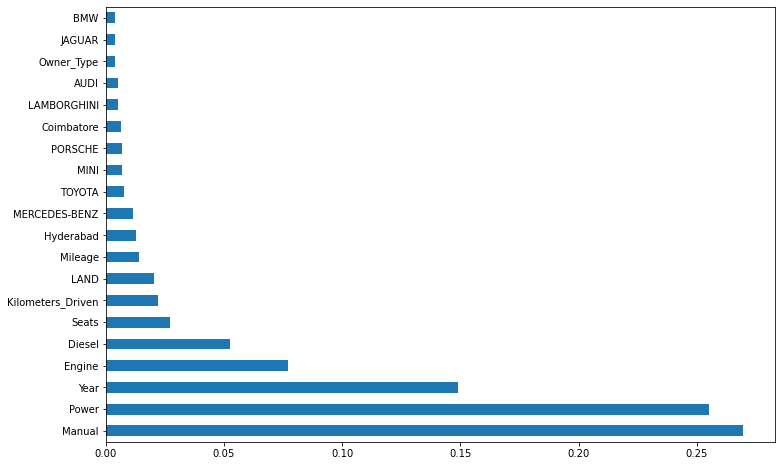

In [41]:
plt.figure(figsize=(12, 8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## RandomForestRegressor

In [43]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

y_pred_regressor = regressor.predict(X_test)

train_score_regressor=regressor.score(X_train, y_train)
test_score_regressor=regressor.score(X_test, y_test)

print('Train Score: ', train_score_regressor)  
print('Test Score: ', test_score_regressor)

Train Score:  0.9861860305232433
Test Score:  0.9230688419417097


In [44]:
from sklearn import metrics

mae_regressor= metrics.mean_absolute_error(y_test, y_pred_regressor)
mse_regressor= metrics.mean_squared_error(y_test, y_pred_regressor)
rmse_regressor=np.sqrt(metrics.mean_squared_error(y_test, y_pred_regressor))

print('MAE:',mae_regressor)
print('MSE:', mse_regressor)
print('RMSE:', rmse_regressor)

MAE: 1.3609840064768421
MSE: 9.04349061215069
RMSE: 3.00723969981621


C:\Users\raksh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

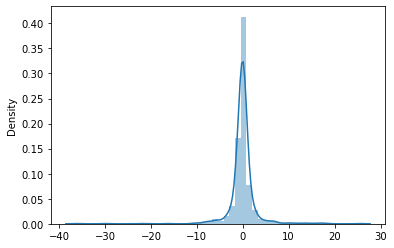

In [45]:
sns.distplot(y_test - y_pred_regressor)

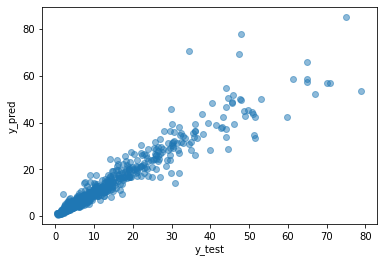

In [46]:
plt.scatter(y_test, y_pred_regressor, alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## Multiple Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression  
linear_regressor= LinearRegression()  
linear_regressor.fit(X_train, y_train)  

y_pred_linear = linear_regressor.predict(X_test)

train_linear_regression=linear_regressor.score(X_train, y_train)
test_linear_regression=linear_regressor.score(X_test, y_test)

print('Train Score: ', train_linear_regression)  
print('Test Score: ', test_linear_regression)

Train Score:  0.7751108479322213
Test Score:  0.7934165325676035


In [48]:
mae_linear_regression=metrics.mean_absolute_error(y_test, y_pred_linear)
mse_linear_regression=metrics.mean_squared_error(y_test, y_pred_linear)
rmse_linear_regression=np.sqrt(metrics.mean_squared_error(y_test, y_pred_linear))

print('MAE:',mae_linear_regression )
print('MSE:', mse_linear_regression)
print('RMSE:',rmse_linear_regression)

MAE: 2.876355266542305
MSE: 24.28451222500594
RMSE: 4.927931840539796


C:\Users\raksh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

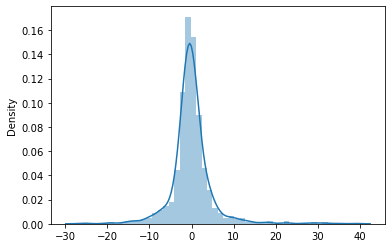

In [49]:
sns.distplot(y_test - y_pred_linear)

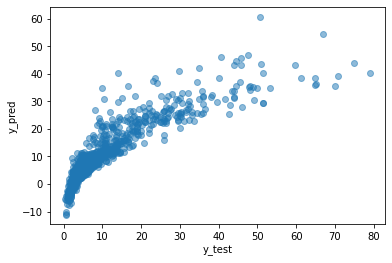

In [50]:
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## Ridge Regression

In [51]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

ridge_regressor = Ridge(alpha=0.01)
ridge_regressor.fit(X_train, y_train) 

y_pred_ridge = ridge_regressor.predict(X_test)

train_ridge_regressor=ridge_regressor.score(X_train, y_train)
test_ridge_regressor=ridge_regressor.score(X_test, y_test)

print('Train Score: ', train_ridge_regressor)  
print('Test Score: ', test_ridge_regressor)

Train Score:  0.7751100447764578
Test Score:  0.7934055358190801


In [52]:
mae_ridge_regressor= metrics.mean_absolute_error(y_test, y_pred_ridge)
mse_ridge_regressor=metrics.mean_squared_error(y_test, y_pred_ridge)
rmse_ridge_regressor=np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge))

print('MAE:',mae_ridge_regressor)
print('MSE:', mse_ridge_regressor)
print('RMSE:', rmse_ridge_regressor)

MAE: 2.8767440869838583
MSE: 24.28580492609799
RMSE: 4.928062999404329


C:\Users\raksh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

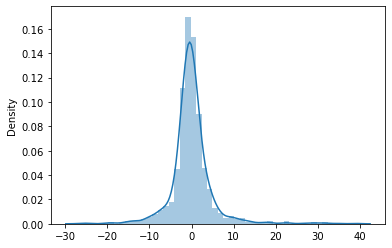

In [53]:
sns.distplot(y_test - y_pred_ridge)

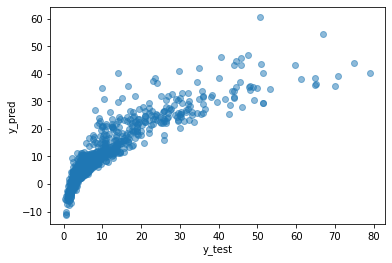

In [54]:
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## Lasso Regression

In [55]:
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train)

y_pred_lasso = model_lasso.predict(X_test)

train_lasso= model_lasso.score(X_train, y_train)
test_lasso=model_lasso.score(X_test, y_test)

print('Train Score: ',train_lasso)  
print('Test Score: ',test_lasso)

Train Score:  0.768082071137205
Test Score:  0.7873583824687473


In [56]:
mae_lasso=metrics.mean_absolute_error(y_test, y_pred_lasso)
mse_lasso=metrics.mean_squared_error(y_test, y_pred_lasso)
rmse_lasso=np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso))

print('MAE:', mae_lasso)
print('MSE:', mse_lasso)
print('RMSE:',rmse_lasso)

MAE: 2.963513083811324
MSE: 24.9966661159495
RMSE: 4.999666600479426


C:\Users\raksh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

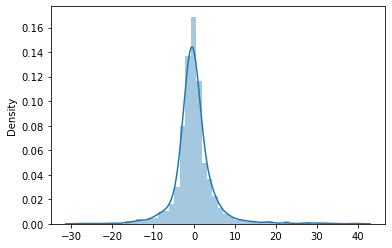

In [57]:
sns.distplot(y_test - y_pred_lasso)

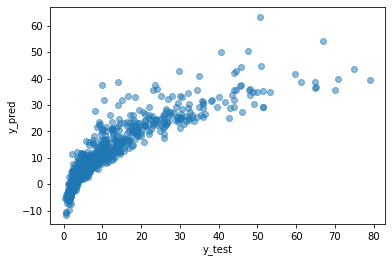

In [58]:
plt.scatter(y_test, y_pred_lasso, alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## ElasticNet

In [59]:
from sklearn.linear_model import ElasticNet

model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 

y_pred_eslasticnet= model_enet.predict(X_test)

train_enet=model_enet.score(X_train, y_train)
test_enet=model_enet.score(X_test, y_test)

print('Train Score: ', train_enet)  
print('Test Score: ', test_enet)

Train Score:  0.7551659887863753
Test Score:  0.7761492259444245


In [60]:
mae_enet=metrics.mean_absolute_error(y_test, y_pred_eslasticnet)
mse_enet=metrics.mean_squared_error(y_test, y_pred_eslasticnet)
rmse_enet=np.sqrt(metrics.mean_squared_error(y_test, y_pred_eslasticnet))

print('MAE:', mae_enet)
print('MSE:', mse_enet)
print('RMSE:', rmse_enet)

MAE: 3.118350234229266
MSE: 26.314336411787675
RMSE: 5.1297501315159275


C:\Users\raksh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

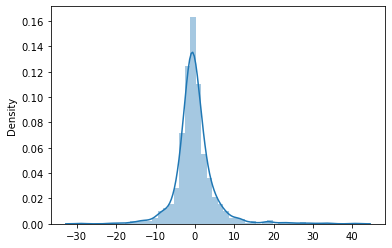

In [61]:
sns.distplot(y_test - y_pred_eslasticnet)

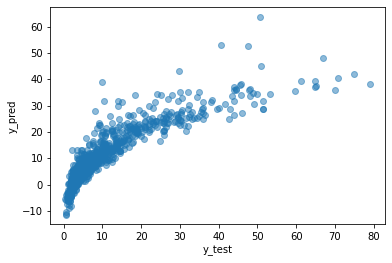

In [62]:
plt.scatter(y_test, y_pred_eslasticnet, alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## DecisionTreeRegressor

In [63]:
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor()
decision_regressor.fit(X_train, y_train)

y_pred_decision_regressor = decision_regressor.predict(X_test)

train_decision_regressor=decision_regressor.score(X_train, y_train)
test_decision_regressor=decision_regressor.score(X_test, y_test)
print('Train Score: ', train_decision_regressor)  
print('Test Score: ',test_decision_regressor)

Train Score:  0.9999976714354087
Test Score:  0.8201832227149037


In [64]:
mae_decision_regressor=metrics.mean_absolute_error(y_test, y_pred_decision_regressor)
mse_decision_regressor=metrics.mean_squared_error(y_test, y_pred_decision_regressor)
rmse_decision_regressor=np.sqrt(metrics.mean_squared_error(y_test, y_pred_decision_regressor))

print('MAE:', mae_decision_regressor)
print('MSE:', mse_decision_regressor)
print('RMSE:', rmse_decision_regressor)

MAE: 1.9092600513259197
MSE: 21.138006736526943
RMSE: 4.5976088063826115


C:\Users\raksh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

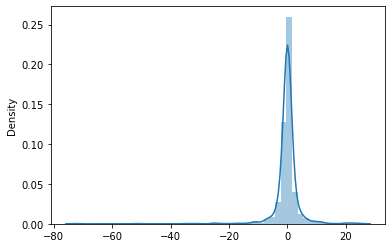

In [65]:
sns.distplot(y_test - y_pred_decision_regressor)

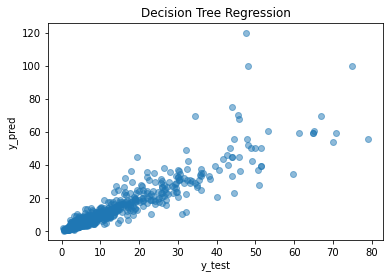

In [66]:
plt.scatter(y_test,y_pred_decision_regressor, alpha=0.5)
plt.title('Decision Tree Regression')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

## Results Visualization

In [67]:
model_names=["RandomForestRegressor","Linear Regression","Ridge Regression","Lasso Regression",
             "ElasticNet","DecisionTreeRegressor"]

Train_socre=[train_score_regressor,train_linear_regression,train_ridge_regressor,train_lasso,train_enet,train_decision_regressor]

Test_score=[test_score_regressor,test_linear_regression,test_ridge_regressor,test_lasso,test_enet,test_decision_regressor]

mae_all=[mae_regressor,mae_linear_regression,mae_ridge_regressor,mae_lasso,mae_enet,mae_decision_regressor]

mse_all=[mse_regressor,mse_linear_regression,mse_ridge_regressor,mse_lasso,mse_enet,mse_decision_regressor]

rmse_all=[rmse_regressor,rmse_linear_regression,rmse_ridge_regressor,rmse_lasso,rmse_enet,rmse_decision_regressor]

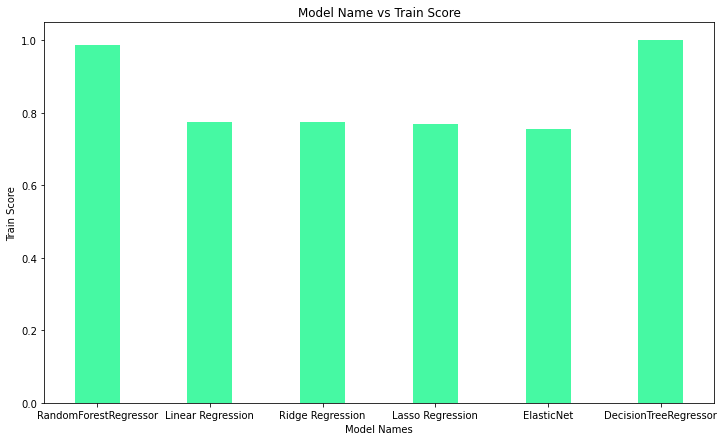

In [68]:
fig = plt.figure(figsize = (12, 7))
plt.bar(model_names, Train_socre, color ='#46F9A3',
        width = 0.4)

plt.xlabel("Model Names")
plt.ylabel("Train Score")
plt.title("Model Name vs Train Score")
plt.show()

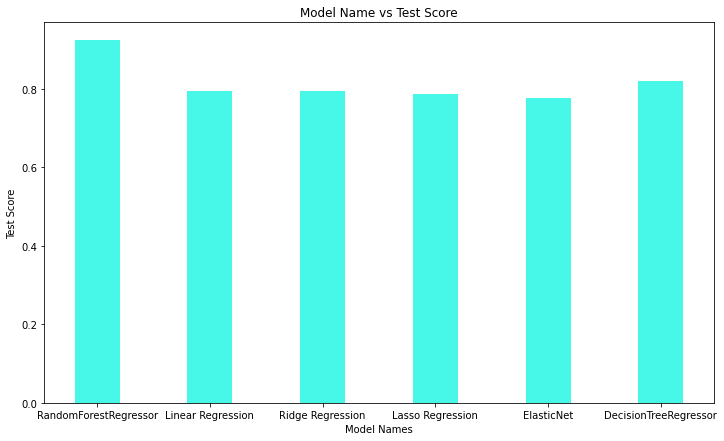

In [69]:
fig = plt.figure(figsize = (12, 7))
plt.bar(model_names, Test_score, color ='#47F8E9',
        width = 0.4)

plt.xlabel("Model Names")
plt.ylabel("Test Score")
plt.title("Model Name vs Test Score")
plt.show()

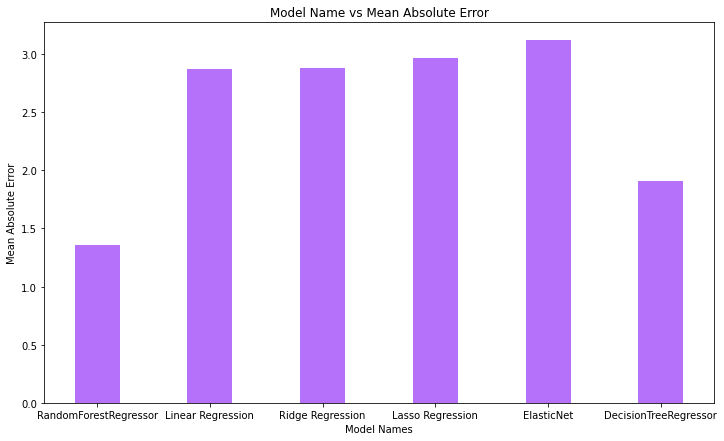

In [70]:
fig = plt.figure(figsize = (12, 7))
plt.bar(model_names, mae_all, color ='#B671FA',
        width = 0.4)

plt.xlabel("Model Names")
plt.ylabel("Mean Absolute Error")
plt.title("Model Name vs Mean Absolute Error")
plt.show()

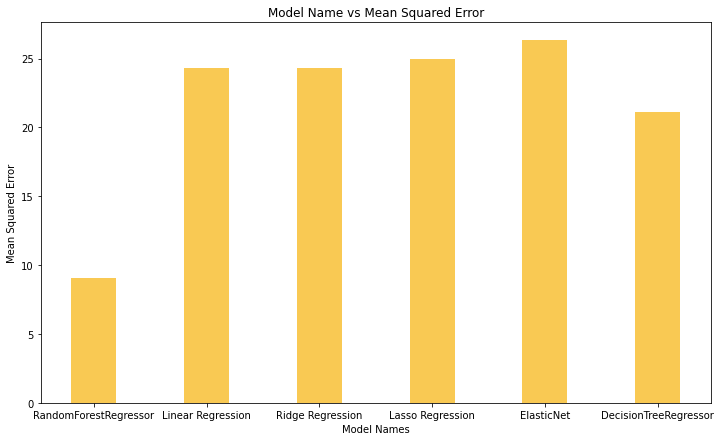

In [71]:
fig = plt.figure(figsize = (12, 7))
plt.bar(model_names, mse_all, color ='#F9C953',
        width = 0.4)

plt.xlabel("Model Names")
plt.ylabel("Mean Squared Error")
plt.title("Model Name vs Mean Squared Error")
plt.show()

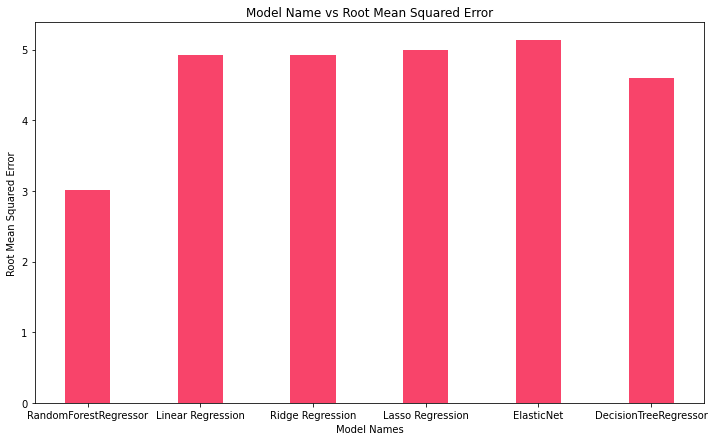

In [72]:
fig = plt.figure(figsize = (12, 7))
plt.bar(model_names, rmse_all, color ='#F8446A',
        width = 0.4)

plt.xlabel("Model Names")
plt.ylabel("Root Mean Squared Error")
plt.title("Model Name vs Root Mean Squared Error")
plt.show()